# Boston Dataset Analysis and Modelling

## Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sklearn
from sklearn.datasets import load_boston

In [3]:
boston_data = load_boston()
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
dataset = pd.DataFrame(boston_data.data,columns = boston_data.feature_names)
dataset["target"] = boston_data.target

### Basic Exploratory Analysis

In [6]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
dataset.shape

(506, 14)

In [7]:
dataset.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

CRIM


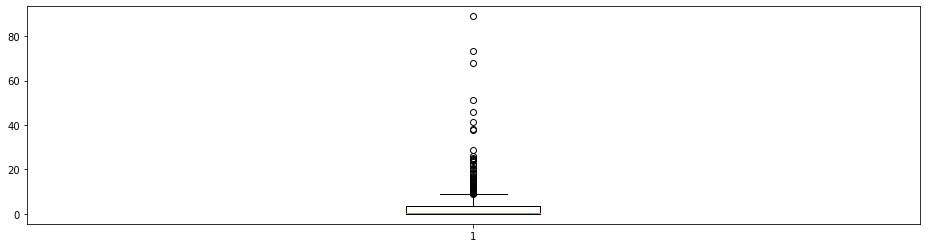

ZN


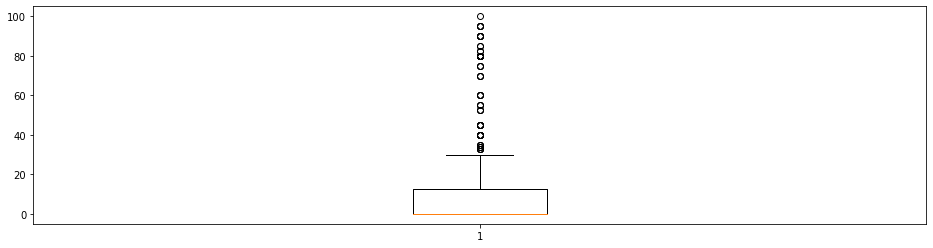

INDUS


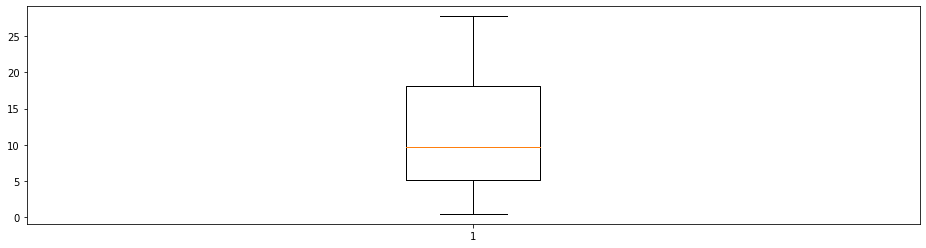

CHAS


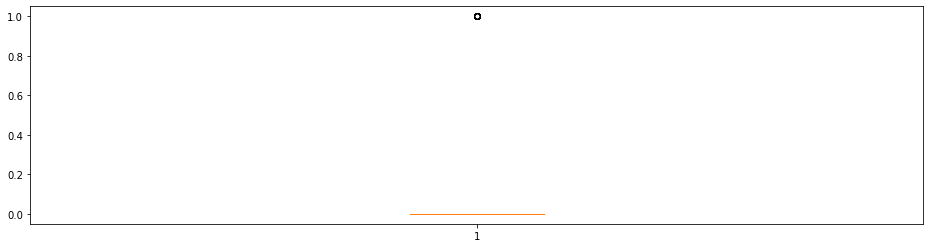

NOX


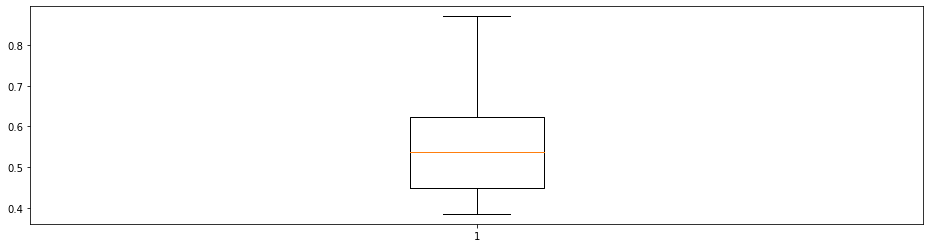

RM


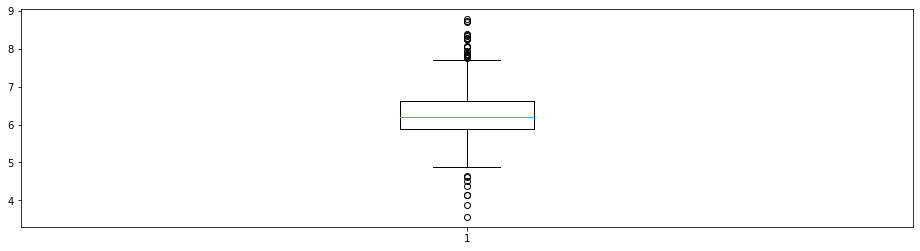

AGE


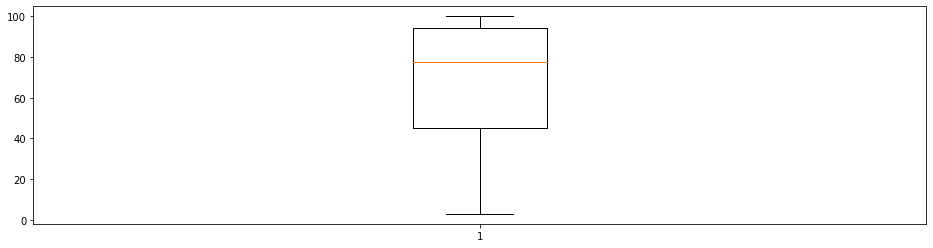

DIS


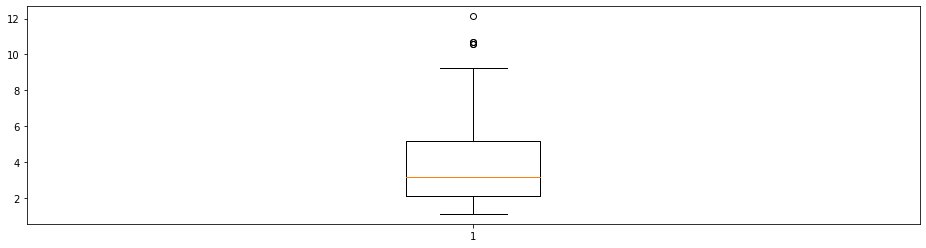

RAD


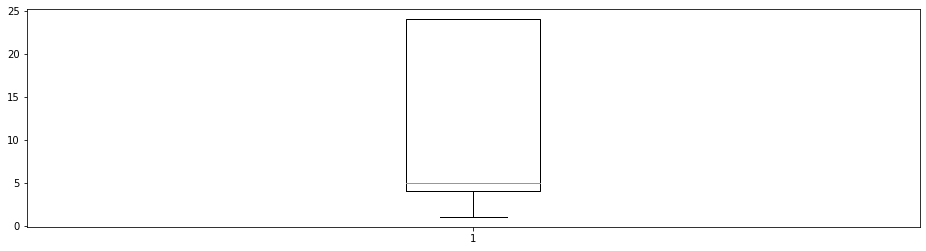

TAX


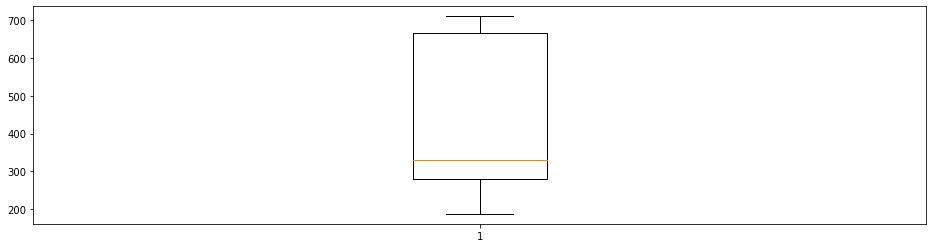

PTRATIO


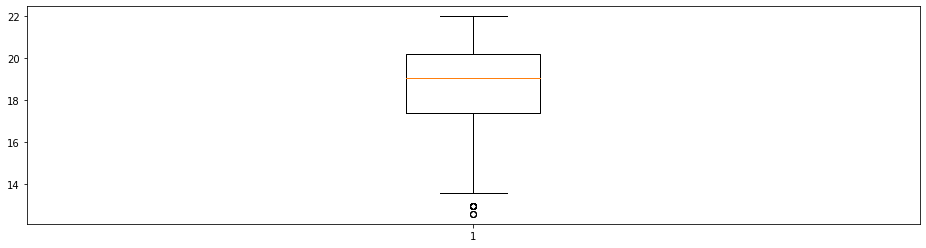

B


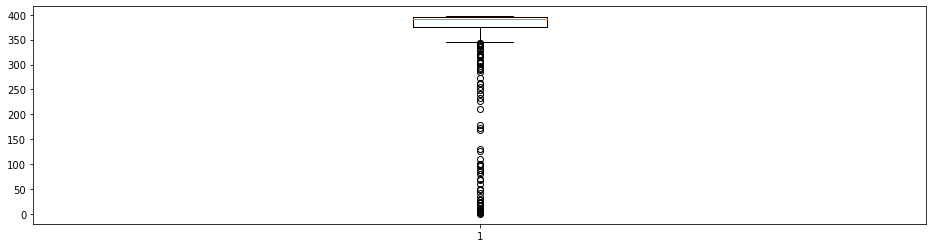

LSTAT


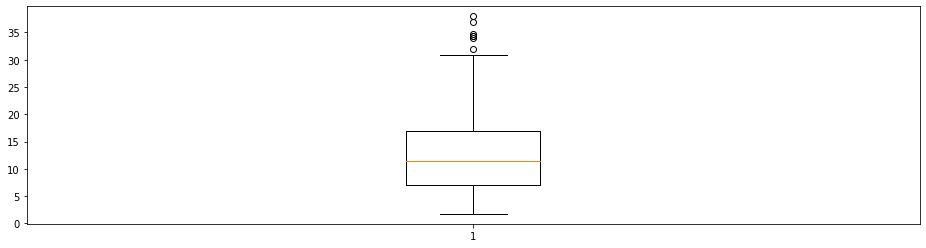

In [12]:
for i in boston_data.feature_names:
    print(i)
    plt.figure(figsize = (16,4))
    plt.boxplot(dataset[i])
    plt.show()

CRIM


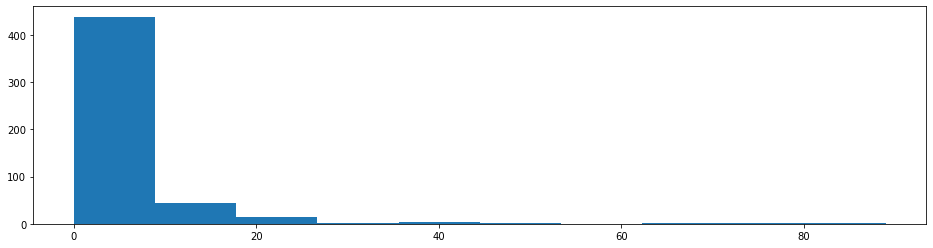

ZN


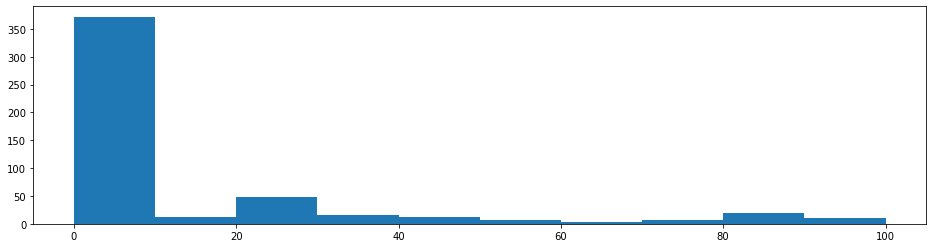

INDUS


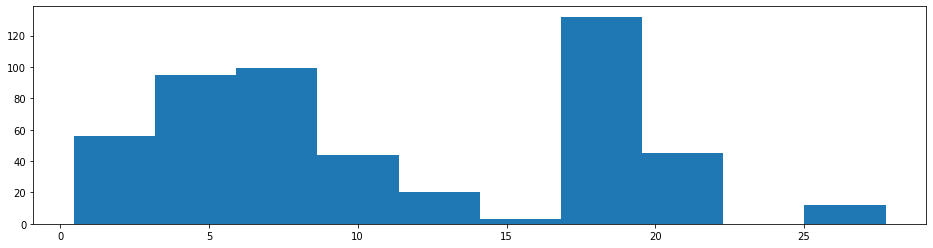

CHAS


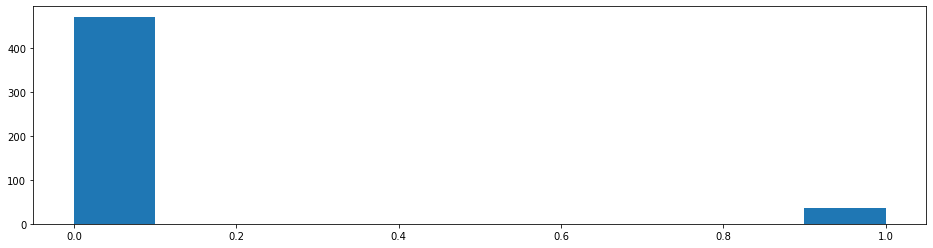

NOX


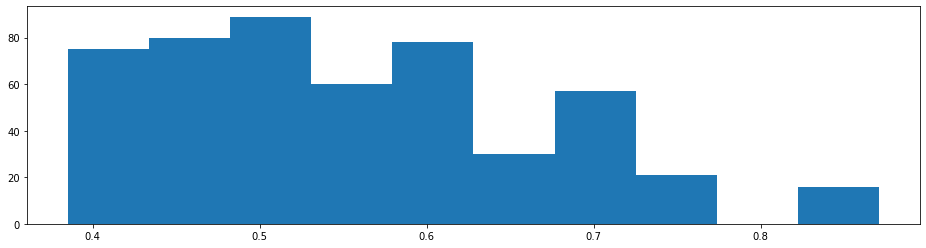

RM


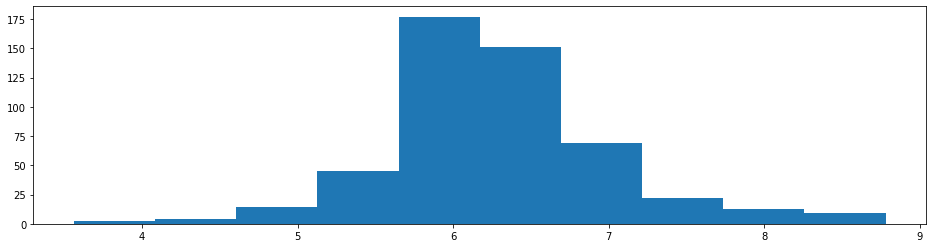

AGE


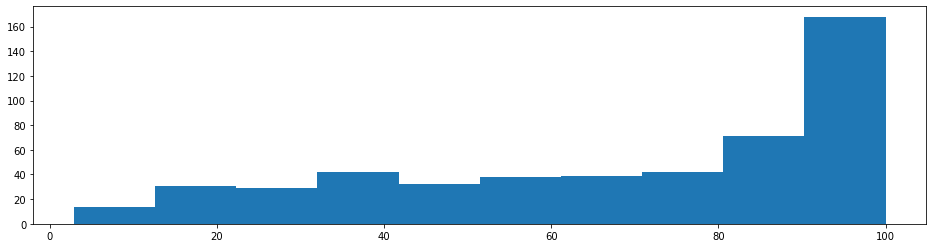

DIS


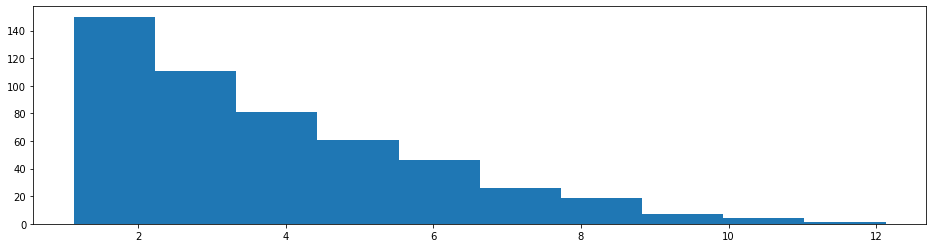

RAD


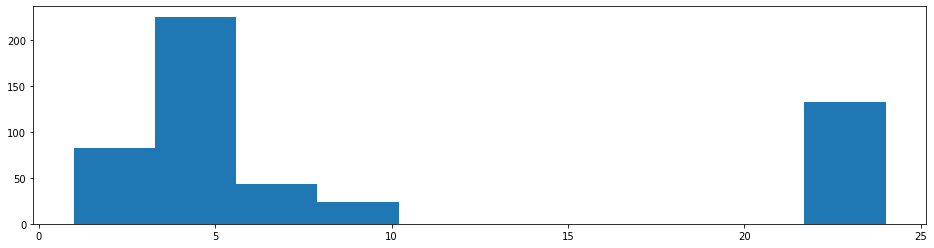

TAX


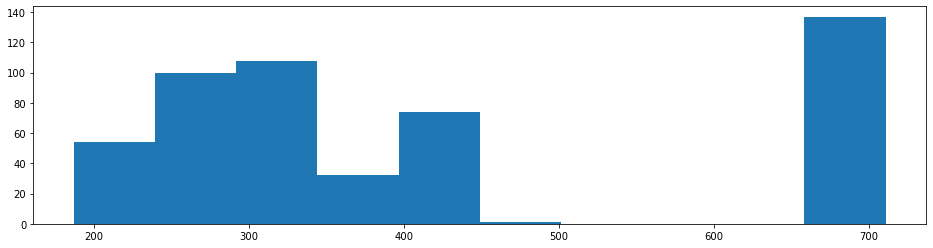

PTRATIO


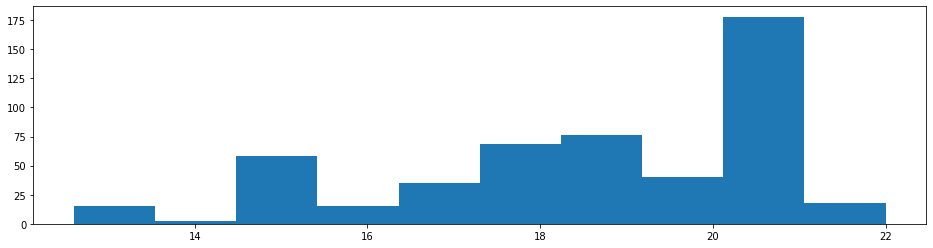

B


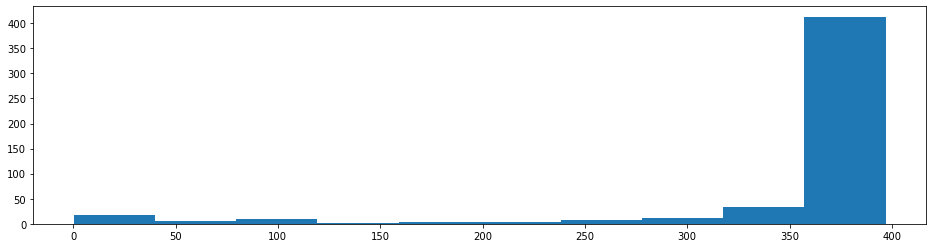

LSTAT


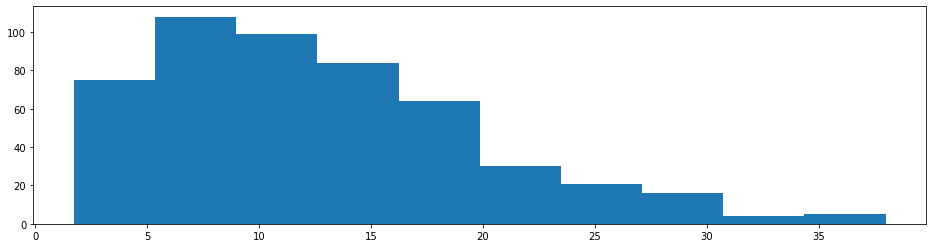

In [13]:
for i in boston_data.feature_names:
    print(i)
    plt.figure(figsize = (16,4))
    plt.hist(dataset[i])
    plt.show()

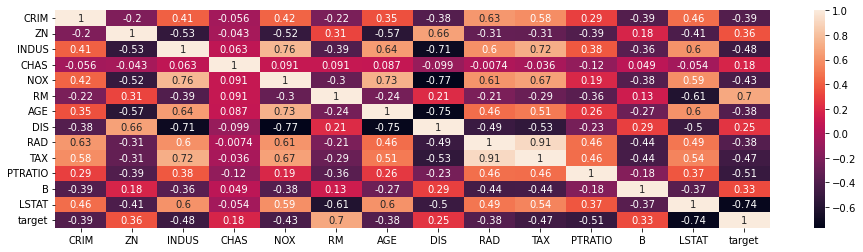

In [17]:
plt.figure(figsize = (16,4))
sns.heatmap(dataset.corr(),annot = True)
plt.show()

In [18]:
dataset = dataset.drop("RAD",axis = 1)

### Initial Modelling

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [27]:
from sklearn.model_selection import train_test_split
X = dataset.drop("target",axis = 1)
y = dataset.target
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [40]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)

print("train set r2_score: ",r2_score(y_train,pred_train))
print("test set r2_score: ",r2_score(y_test,pred_test))

train set r2_score:  0.7149187097459346
test set r2_score:  0.7789181825925773


In [41]:
svr = SVR()
svr.fit(x_train,y_train)
pred_train = svr.predict(x_train)
pred_test = svr.predict(x_test)

print("train set r2_score: ",r2_score(y_train,pred_train))
print("test set r2_score: ",r2_score(y_test,pred_test))

train set r2_score:  0.17963700875923694
test set r2_score:  0.27502216031426885


In [42]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_train = rfr.predict(x_train)
pred_test = rfr.predict(x_test)

print("train set r2_score: ",r2_score(y_train,pred_train))
print("test set r2_score: ",r2_score(y_test,pred_test))

train set r2_score:  0.9819205467497258
test set r2_score:  0.9029816512986116


In [43]:
lasso = Lasso()
lasso.fit(x_train,y_train)
pred_train = lasso.predict(x_train)
pred_test = lasso.predict(x_test)

print("train set r2_score: ",r2_score(y_train,pred_train))
print("test set r2_score: ",r2_score(y_test,pred_test))

train set r2_score:  0.6582022683143738
test set r2_score:  0.7247064858802468


### Final dataset Preparation

In [44]:
dataset_1 = dataset

In [45]:
dataset_1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset_1 = scaler.fit_transform(dataset_1)

In [56]:
x = dataset.columns
dataset_1 = pd.DataFrame(dataset_1,columns = x)
print(dataset_1.shape)
dataset_1.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.066794,0.648936,1.000000,0.099338,0.693333


In [52]:
from sklearn.metrics.cluster import entropy
for i in (dataset_1.drop("target",axis = 1)).columns:
    print(i," ",entropy(dataset[i]))

CRIM   6.221057244935212
ZN   1.351723187890945
INDUS   3.48566303876947
CHAS   0.2514865814735088
NOX   4.160270514420897
RM   6.055949415276041
AGE   5.581138669264877
DIS   5.938622966678485
TAX   3.3459015235567695
PTRATIO   3.0692448048180276
B   4.998197363403648
LSTAT   6.081640912101819


In [75]:
from sklearn.feature_selection import SelectKBest,f_regression
select_best = SelectKBest(score_func = f_regression, k = "all")
dataset_2 = select_best.fit_transform(dataset_1.drop("target",axis = 1),dataset_1.target)

In [77]:
select_best.scores_

array([ 89.48611476,  75.2576423 , 153.95488314,  15.97151242,
       112.59148028, 471.84673988,  83.47745922,  33.57957033,
       141.76135658, 175.10554288,  63.05422911, 601.61787111])

In [76]:
dataset_2 = pd.DataFrame(dataset_2)
dataset_2.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.066794,0.648936,1.000000,0.099338


In [78]:
dataset_2["target"] = dataset_1.target

In [79]:
dataset_2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.066794,0.648936,1.000000,0.099338,0.693333


In [89]:
X = dataset_2.drop("target",axis = 1)
y = dataset_2.target
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [90]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)

print("train set r2_score: ",r2_score(y_train,pred_train))
print("test set r2_score: ",r2_score(y_test,pred_test))

train set r2_score:  0.7187123735749257
test set r2_score:  0.749129966709722


In [91]:
svr = SVR()
svr.fit(x_train,y_train)
pred_train = svr.predict(x_train)
pred_test = svr.predict(x_test)

print("train set r2_score: ",r2_score(y_train,pred_train))
print("test set r2_score: ",r2_score(y_test,pred_test))

train set r2_score:  0.8556151294349174
test set r2_score:  0.8851300278961265


In [92]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_train = rfr.predict(x_train)
pred_test = rfr.predict(x_test)

print("train set r2_score: ",r2_score(y_train,pred_train))
print("test set r2_score: ",r2_score(y_test,pred_test))

train set r2_score:  0.9819834247081999
test set r2_score:  0.9142313924887931


## Conclusion

### Support Vector Machine - Regressor gave a good outcome 0.885 r2_score